## Observations and Insights 


In [206]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [117]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [118]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [119]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice, unique values 
#(add 'n' to the front of unique to count the different unique values) ) 
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [121]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes =  combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
dupes

array(['g989'], dtype=object)

In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data = combined_data.drop_duplicates(subset=['Mouse ID'])
#clean_data
clean_data = combined_data[combined_data['Mouse ID'].isin(dupes) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [124]:
# Checking the number of mice in the clean DataFrame. using nunique function, number of unique features
clean_data["Mouse ID"].nunique()

248

# Summary Statistics
* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
* Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
* mean, median, variance, standard deviation, and SEM of the tumor volume. 
* Assemble the resulting series into a single summary dataframe.

In [125]:
#Calculated the mean, median,var, STD, SEM by using groupby of the column names
mean_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

med_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

var_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

std_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

sem_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean" : mean_cleandata, "Median": med_cleandata, "Variance" : var_cleandata, "Standard Deviation": std_cleandata, "SEM" : sem_cleandata})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [126]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [127]:

drugdata = clean_data["Drug Regimen"].value_counts()
drugdata

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

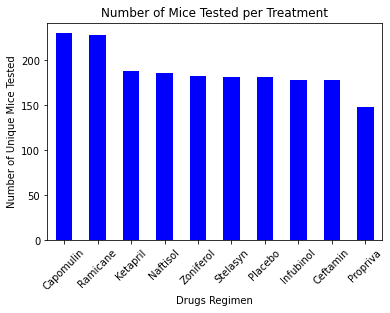

In [128]:
# Create a dataframe counting the number of data points for each Drug Regimen
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
 
drugdata = clean_data["Drug Regimen"].value_counts()
y_axis = drugdata.values
x_axis = drugdata.values
plt.xlabel('Drugs Regimen')
plt.ylabel('Number of Unique Mice Tested') 
plt.title("Number of Mice Tested per Treatment")
drugdata.plot(kind="bar", color="blue")
plt.xticks(rotation="45")

<function matplotlib.pyplot.show(*args, **kw)>

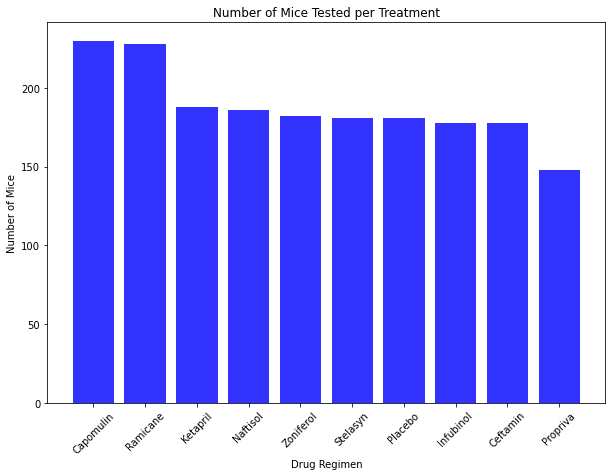

In [129]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = drugdata.index.values
y_axis = drugdata.values
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="45")
plt.show 


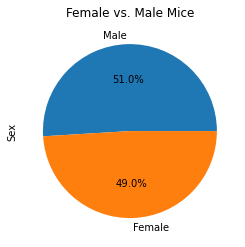

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

drugdata_sex = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
drugdata_sex.plot.pie(autopct= "%1.1f%%")

(-1.25, 1.25, -1.25, 1.25)

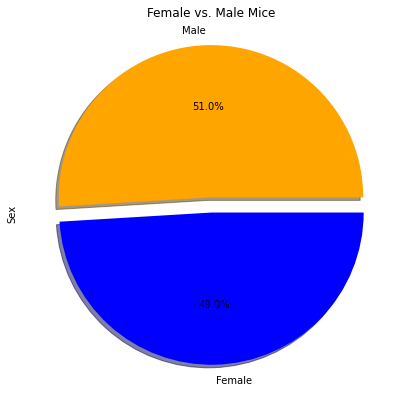

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x_axis = drugdata_sex.index.values
y_axis = drugdata_sex.values
labels = ['Female', 'Male']
colors = ['orange', 'blue']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 7))
drugdata_sex.plot.pie(explode=explode, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Female vs. Male Mice")
plt.axis()

<ipython-input-132-4b8e1a4e3a34>:9: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 14)


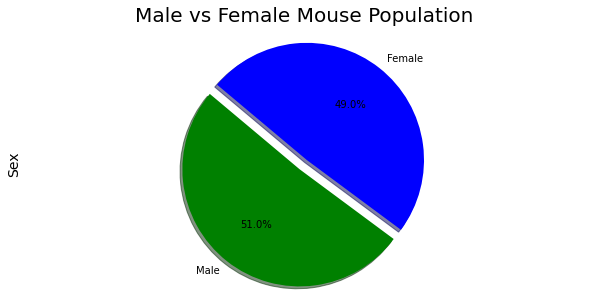

In [132]:
#Male vs Female mice poplulation in the data set using 
labels = ['Female', 'Male']
colors = ['green', 'blue']
explode = (0.1, 0)
sizes = [49.7999197, 50.200803]
plot = drugdata_sex.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)
plt.show()

## Quartiles, Outliers and Boxplots

In [133]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [134]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

# View the result to confirm transpose
last_timepoint.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_size,NaN,NaN,67.973419,NaN
a251,tumor_size,NaN,NaN,65.525743,NaN
a275,tumor_size,NaN,62.999356,NaN,NaN
a411,tumor_size,NaN,NaN,NaN,38.407618
a444,tumor_size,NaN,NaN,NaN,43.047543


In [135]:
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [155]:
# Put treatments into a list for for loop (and later for plot labels)   

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [157]:
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))

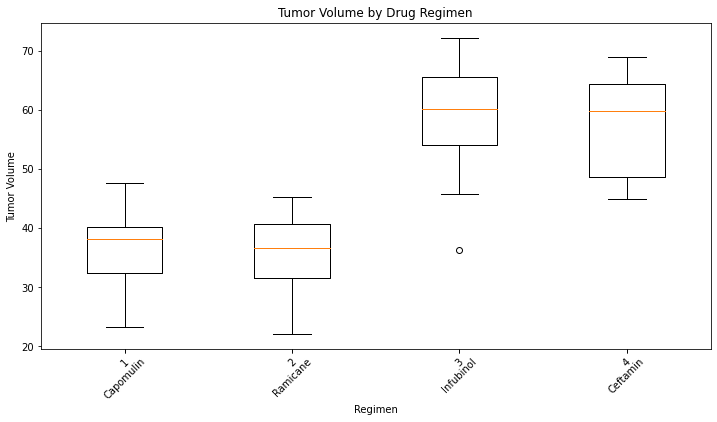

In [178]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(figsize=(12,6))
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

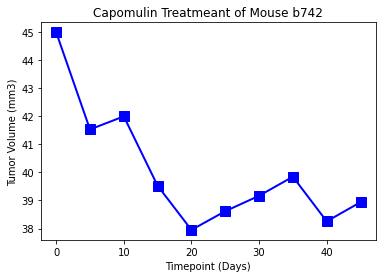

In [198]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#We chose to look up and show MouseID "b742" however you can plug in 
#any mouse ID and the graph will popluate the inforamtion. 
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

forline_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "b742",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatmeant of Mouse b742')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=10, marker="s",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [199]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


# The hjhgkfjghl
*jfhgk
*hhjkk

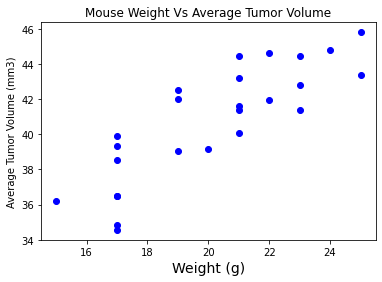

In [204]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.709


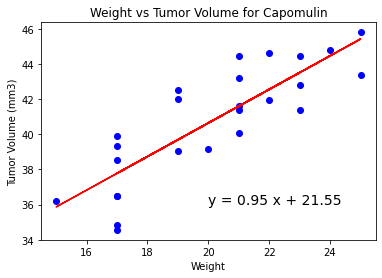

In [215]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()